## Demo of Curve fit Method for Lithium-ion Batteries
A curve fitting procedure to facilitate the battery rate-capacity analysis approach outlined by [*R. Tian & S. Park et. al.*](https://www.nature.com/articles/s41467-019-09792-9)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../batteryratecap')
import fitcaprate

In [2]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

### The Battery Capacity Dataset
We explore the dataset of the battery capacity as a function of discharge rate

In [3]:
# load dataset
filepath = os.path.join('../doc/Data', 'performancelog.xls')
dframe = pd.read_excel(filepath, sheet_name='CapacityRate',
                       header=[0, 1, 2])
dframe.head()
# dframe.columns[0]

Paper # 1                                              Paper #4  \
   set #1 E                   set #1 M                   set #1 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate   
0  0.026661       110.350768  0.287220        92.322541  0.048147   
1  0.147635        99.595634  0.566392        82.739099  0.121655   
2  0.279776        96.285964  0.836257        72.391035       NaN   
3  0.566392        85.000231  1.406232        52.891525       NaN   
4  0.838584        75.122293  2.810928        26.834216       NaN   

                                                                          ...  \
                    set #2 E                   set #3 E                   ...   
  Capacity (mAh/g)    C rate Capacity (mAh/g)    C rate Capacity (mAh/g)  ...   
0         0.355790  0.059551         0.363598  0.096021         0.364299  ...   
1         0.170715  0.162193         0.128205       NaN              NaN  ...   
2              NaN       NaN              NaN       NaN              NaN  ...   
3              NaN       NaN              NaN       NaN              NaN  ...   
4              NaN       NaN              NaN       NaN              NaN  ...   

  Paper #23                                              Paper #27  \
   set #1 E                   set #2 E                    set #1 E   
     C rate Capacity (mAh/g)    C rate Capacity (mAh/g)     C rate   
0  8.712551        83.585488  4.850202       122.836782   2.004132   
1  7.425101       108.152845  3.587045       126.225383   4.979339   
2  6.137652       117.471497  2.299595       127.919683   9.938017   
3  4.850202       122.836782  1.012146       129.896367  20.061983   
4  3.587045       126.225383  7.400810       104.481860        NaN   

                    Paper #31                                               
                     set #1 E                    set #2 E                   
  Capacity (mAh/g)     C rate Capacity (mAh/g)     C rate Capacity (mAh/g)  
0       134.186747  30.141129        61.467890  30.100806        24.770642  
1       134.512048   9.979839        79.816514   9.939516       131.192661  
2       124.753012   4.979839       244.954128   4.939516       206.422018  
3        84.740964   0.423387       301.834862   0.463710       311.009174  
4              NaN        NaN              NaN        NaN              NaN  

[5 rows x 40 columns]

### Below we visualize the dataset of the battery capacity as a function of discharge rate. 
We will use this dataset to determine the parameters of the model: the discharge rate constant, the n factor for the discharge rate, and the specific capacity

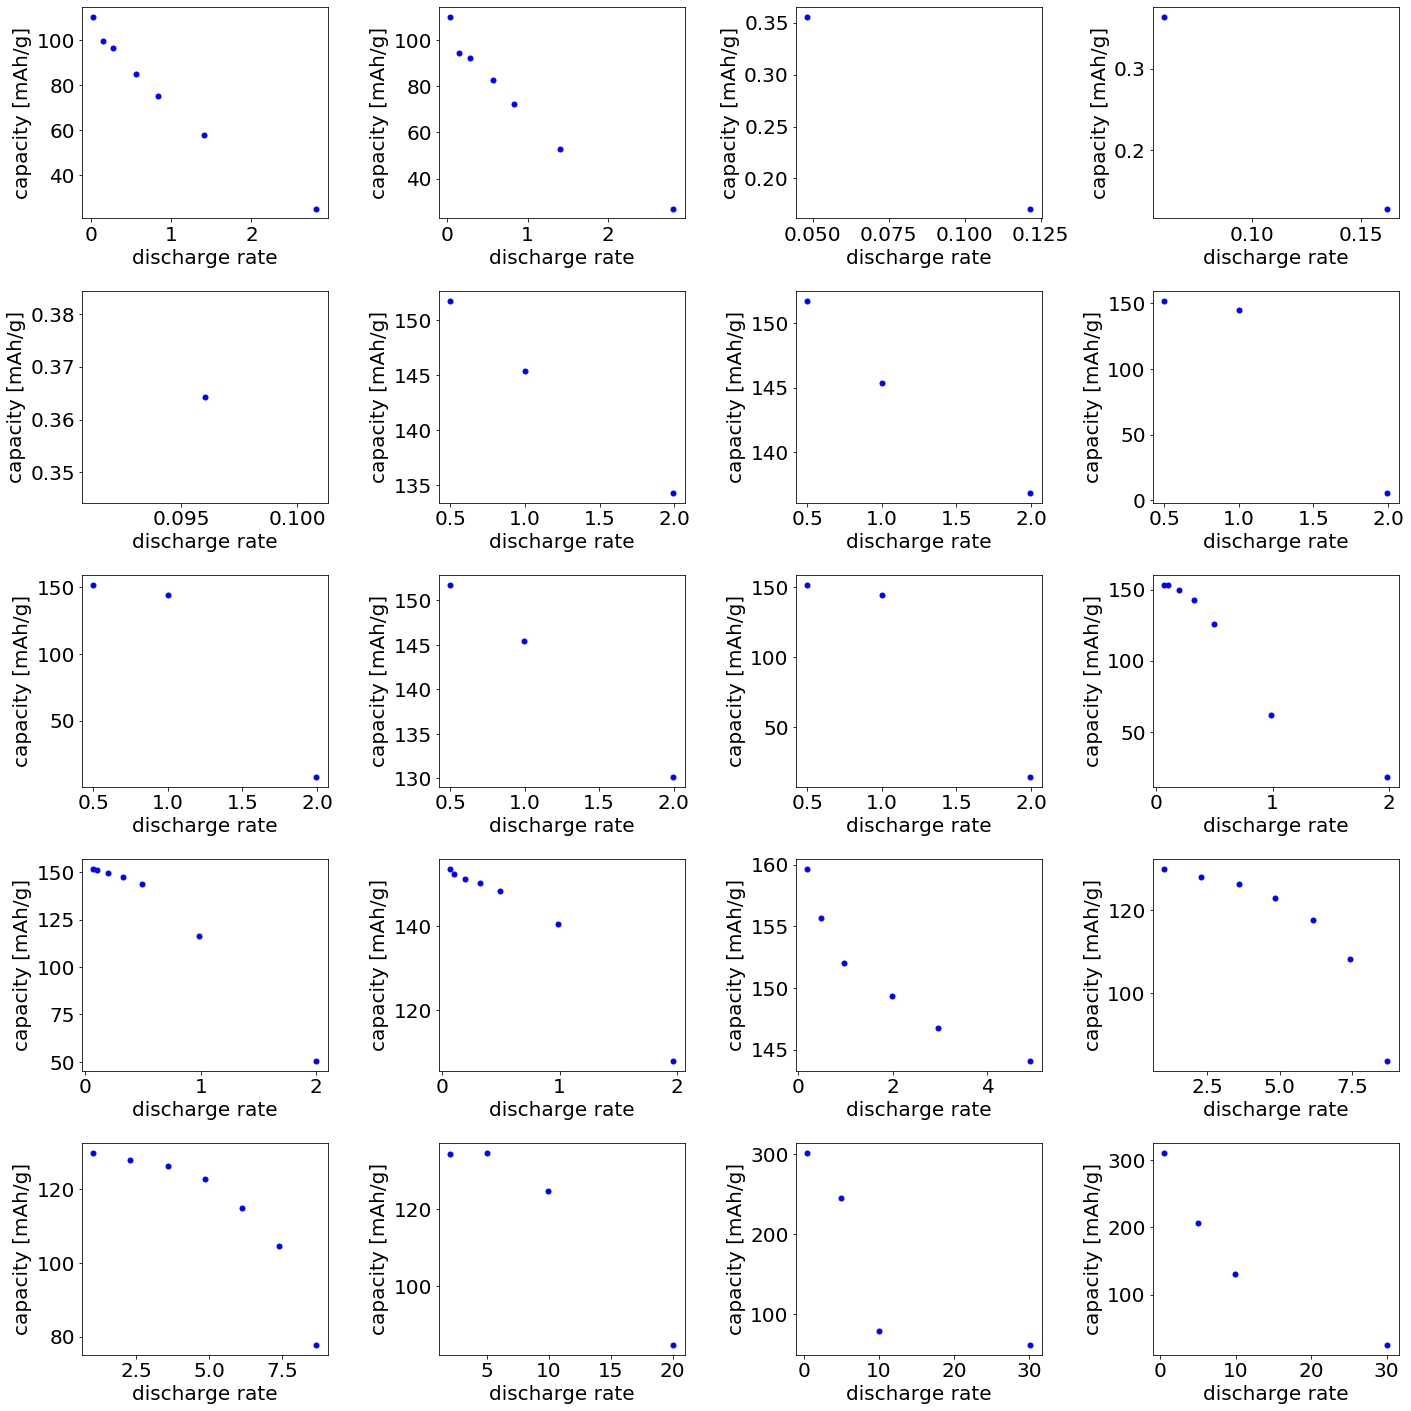

In [4]:
fig1 = plt.figure(figsize=(20, 20))

for i in range(int(len(dframe.columns)/2)):
    ax = plt.subplot(5, 4, i+1)  # five rows and four columns
    # even columns for xdata; odd columns for ydata
    # then sort values by the even(th) columns
    indeven = (2 * i)
    indodd = indeven + 1
    data = dframe.iloc[:, [indeven, indodd]].sort_values(by=dframe.columns[indeven])
    xdata = data[dframe.columns[indeven]].to_numpy()
    ydata = data[dframe.columns[indodd]].to_numpy()
    ax.plot(xdata, ydata,
            color='b', marker='o',
            markersize=5, linestyle='None',
            label='data')
    ax.set_xlabel('discharge rate')
    ax.set_ylabel('capacity [mAh/g]') # mass normalized capacity
    plt.tight_layout()

#### Fig. 1 Mass normalized capacity as a function of the discharge rate of lithium-ion batteries
In general we note that an increase in the discharge rate, also know as the high-power performance of the battery, results in a lower battery capacity; 

### Compare the predicted vs known capacity as a function of battery discharge
Next we fit the capacity vs rate discharge model to the dataset. 
We use this dataset to determine the parameters of the model: the discharge rate constant, the n factor for the discharge rate, and the specific capacity. We use these parameters to make predictions of the mass normalized capacity, and we compare these results to the known values.

In [5]:
#The fit module fits the dataset above and saves to an excel file
output_file = '../doc/Data/fitparameters.xlsx'
fitcaprate.fitmodel(dframe, output_file, params0 = [0.5, 1, 100])  # we call the fit module
# Load the output excel file to see the best fittting parameters
dframe_out = pd.read_excel(output_file)
dframe_out.head()

,Unnamed: 0,Paper #,Set,tau,n,Q,sigma_tau,sigma_n,sigma_Q
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,1.0,0.485641,1.302511,106.109020,0.040999,0.166671,3.111691
2,1.0,1.0,1.0,0.487356,1.171666,105.112479,0.052061,0.180996,3.983500
3,2.0,4.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.0,4.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The above table shows the optimized parameters of the fit model, which we use to predict the capacity-rate trend, and we compare this prediction to the experimentally observed trend.
Note that we fit only sets in the dataset with four or more data points

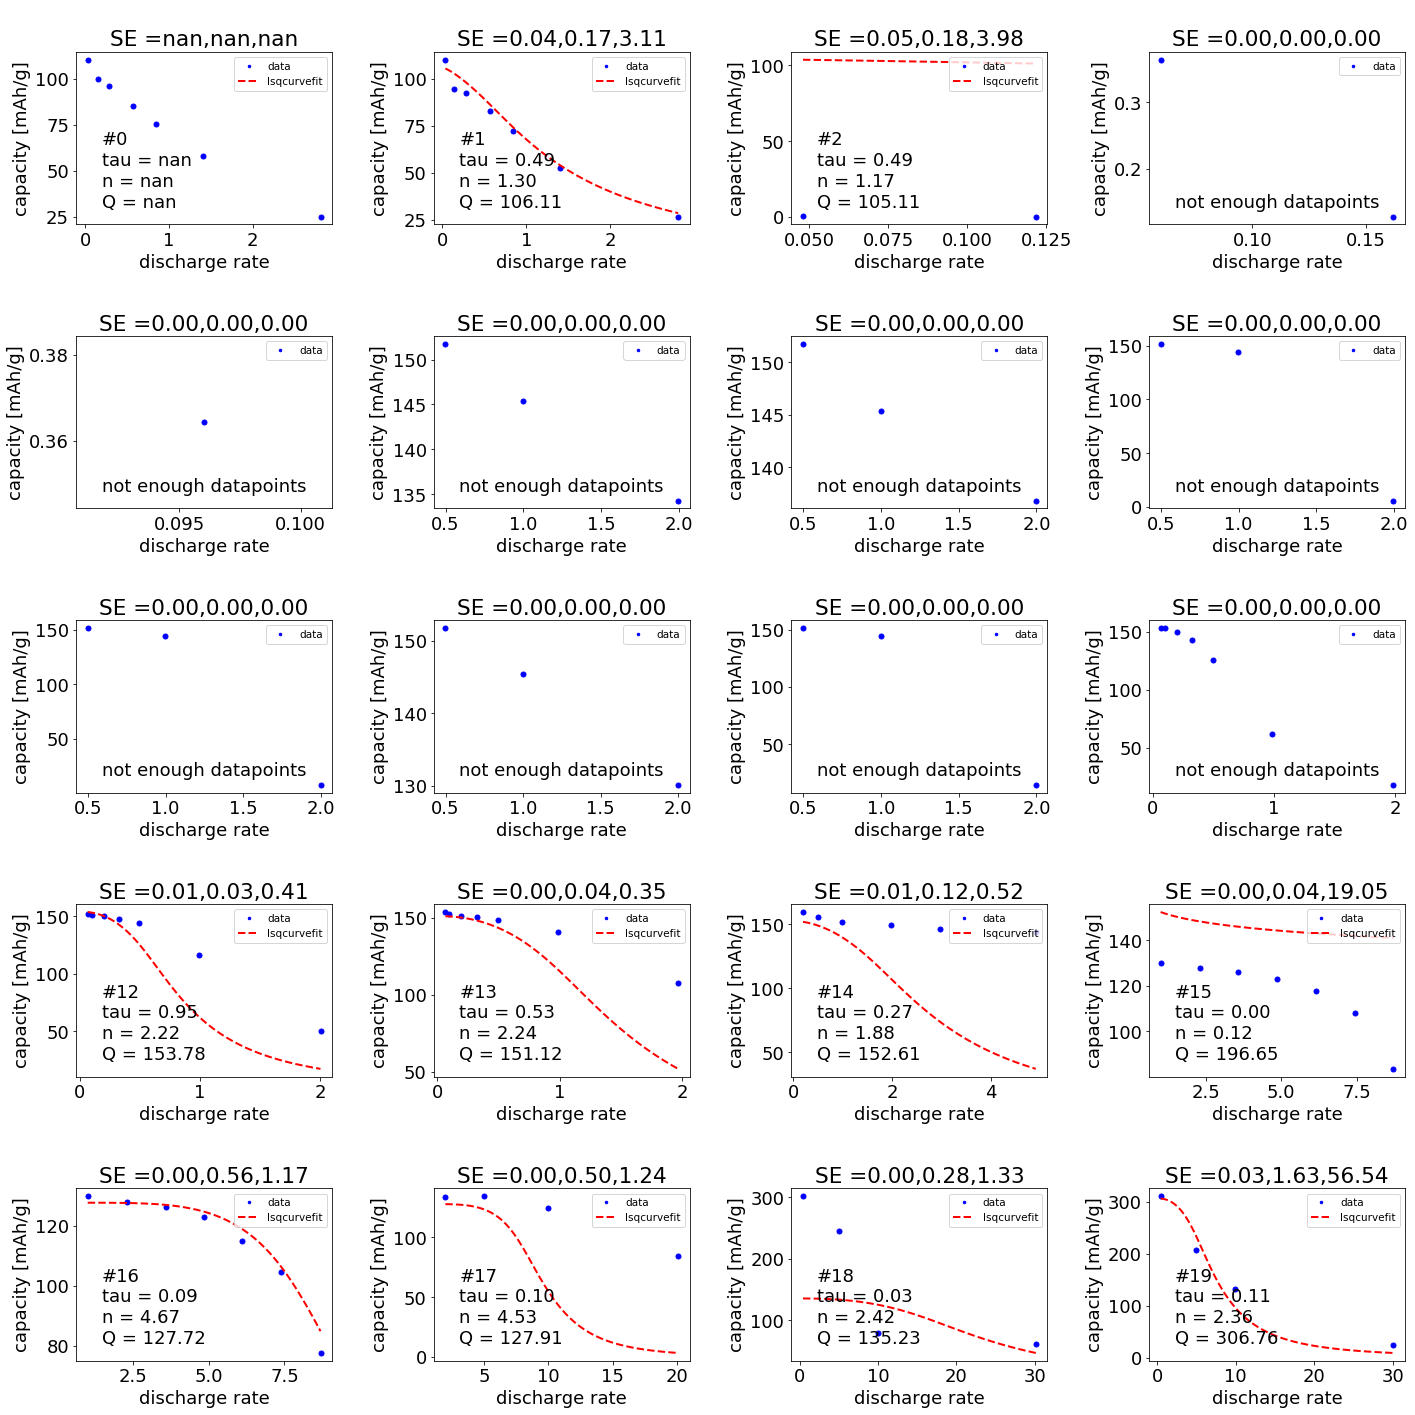

In [6]:
fitcaprate.plotfit(dframe, dframe_out)

#### Fig. 2 Comparison of predicted vs known capacity as a function of battery discharge
In **Fig. 2** note that we fit only sets in the dataset of **Fig.1** with four or  more data points